#Лабораторная работа №7


#Основное задание




Написать базовый класс BaseProcessing, который предоствляет интерфейс для обработки данных (сигналы и изображения).

В классе BaseProcessing реализовать следующие абстрактные методы:

**Интерфейс BaseProcessing**

* `_filtering()` — осуществляет фильтрацию (абстрактный метод).
* `visualize()` — визуализирует сигнал/изображение (абстрактный метод).
* `get_shape()` — возвращает размерность (абстрактный метод).
* `feature_extraction()` — возвращает вектор признаков (абстрактный метод).


Класс SignalProcessing наследует BaseProcessing и переопределяет его методы

**Интерфейс SignalProcessing** (код для реализации отдельных методов ниже)

* _конструктор_ — принимает на вход путь к файлу и создает соответствующие поля
* `_filtering(signal)` — осуществляет фильтрацию сигнала (возвращает отфильтрованный сигнал).
* `visualize()` — визуализирует сигнал.
* `get_shape()` — возвращает длину сигнала.
* `_signal_find_peaks(signal, find_peaks_parametres)` — находит точки максимума сигнала и возвращает их в виде списка.
* `_calculate_RR_intervals()` — производит расчет длительности RR интервалов (попарных расстояний между пиками) и возвращает длины RR интервалов в виде списка.
В этом методе вызываются методы _filtering и _signal_find_peak.
* `feature_extraction()` — возвращает статистические характеристики RR интервалов на записи ECG - среднее, std, min, max (в виде списка - вектор признаков). В этом методе вызывается метод _calculate_RR_intervals.

Класс ImageProcessing наследует BaseProcessing и переопределяет его методы

**Интерфейс ImageProcessing** (код для реализации отдельных методов из предыдущей лабораторной)

* _конструктор_ — принимает на вход путь к файлу и создает соответствующие поля
* `_filtering(image)` — применяет фильтр Гаусса к изображению (возвращает отфильтрованное изображение).
* `visualize()` — визуализирует изображение.
* `get_shape()` — возвращает размерность изображения.
* `_create_gabor_filter(parameters)` — создает и возвращает фильтр Габора с заданными параметрами.
* `feature_extraction()` — применяет _filtering() к изображению, считает признаки с _create_gabor_filter(parameters)и возвращает вектор признаков: среднее и дисперсию по изображению.

Изображение и синал находятся в папке

In [2]:
!pip install wfdb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.0/160.0 kB 3.0 MB/s eta 0:00:00


In [4]:
!pip install heartpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 10.6 MB/s eta 0:00:00


In [5]:
from skimage.filters import gabor_kernel
from scipy import ndimage as ndi
import cv2 as cv
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import wfdb
import heartpy as hp
from scipy.signal import find_peaks

<ipython-input-5-6a0ceb019dc0>:5: DeprecationWarning: Please import `gaussian_filter` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import gaussian_filter


###Для сигнала

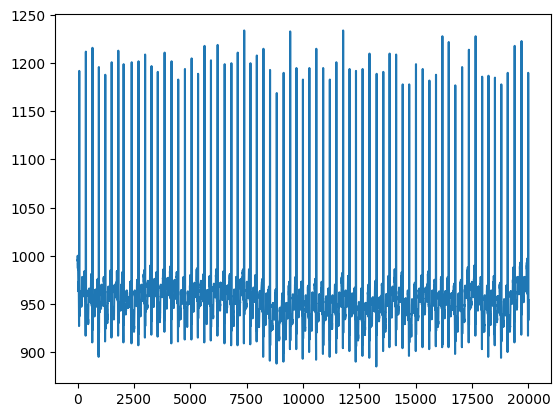

In [9]:
#загрузка сигнала из .csv файла с pandas
df = pd.read_csv('ecg.csv')
plt.plot(df['MLII'])
plt.show()

In [10]:
#размерность
df['MLII'].shape

(20000,)

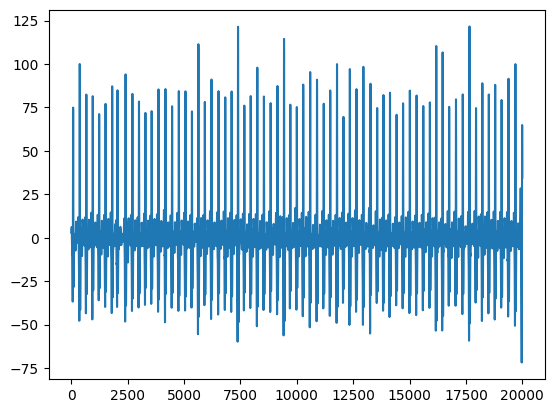

In [11]:
#фильтрация сигнала с библиотекой heartpy
filtered = hp.filter_signal(df['MLII'], cutoff = [0.75, 3.5], sample_rate = 100, order = 3, filtertype='bandpass')
plt.plot(filtered)
plt.show()

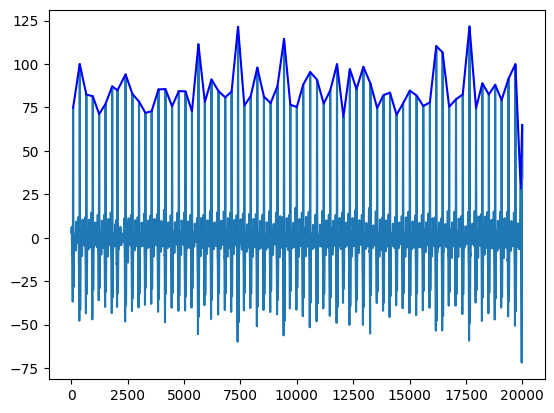

In [31]:
#поиск точек максимума с библиотекой scipy
peaks, _ = find_peaks(filtered, height=20)
plt.plot(filtered)
plt.plot(peaks, filtered[peaks], "b")
plt.show()

###Для изображения

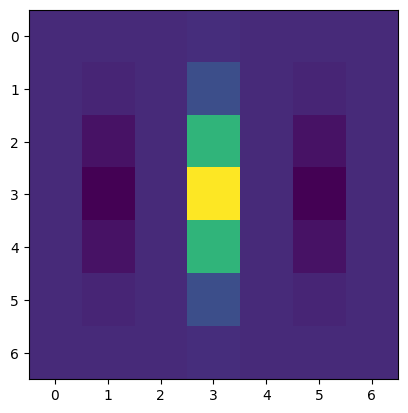

In [14]:
#Создание фильтра Габора
frequency = 0.25
theta = np.pi
sigma = 1
kernel = np.real(gabor_kernel(frequency, theta=theta, sigma_x=sigma, sigma_y=sigma))
plt.imshow(kernel)
plt.show()

In [21]:
#Чтение изображения
image = cv2.imread ("chest-xray.tif", cv2.IMREAD_GRAYSCALE)
#Применение филтра Гаусса к изображению
image_filtered = ndi.gaussian_filter(image, .5)

In [22]:
#Размерность изображения
image.shape

(493, 600)

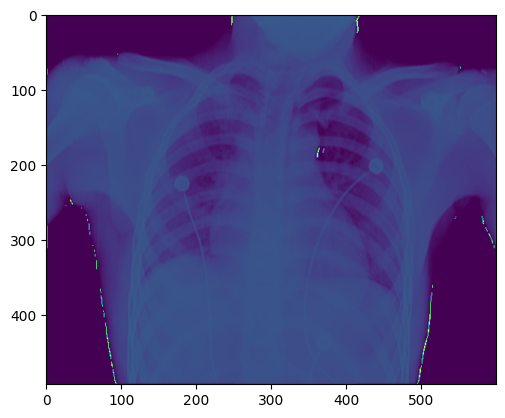

In [23]:
#свертка изображения с фильтром Габора
conv = ndi.convolve(image_filtered, kernel, mode='wrap')
plt.imshow(conv)
plt.show()

In [24]:
#Расчет вертора признаков изображения
feats = [conv.mean(), conv.var()]

#Задача * "Классификатор"

В классе BaseProcessing реализовать метод:
* `get_predict(features, etalons_features)` — метод, в котором осуществляется классификация на основе рассчета Евклидова расстояния между features изображения или сигнала и эталонными значениями признаков (etalons_features) каждого класса изображений или сигналов. Классификация осуществляется следующим образом: полученные Евклидовы расстояния ранжируются в порядке возрастания. Чем меньше Евклидово расстояние, тем более похожим на эталонное изображение считается наше изображение. Выбирается индекс соответствуюших эталонных признаков, которые и являются номером класса. Эталонных класса 2, т.е. возвращается 0 или 1, т.е. класс к которому относится изображение/сигнал.

Классы SignalProcessing и ImageProcessing наследуют реализованный метод get_predict.

Продемонстрировать вызов метода в классах

Эталонные признаки (etalons_features) могут подаются в формате списка:
[[1, 8], [5, 0.5]] -> тогда класс вернуть по индексу

или в формате словаря [{'features': [1, 8], 'class': 0}, {'features': [5, 0.5], 'class': 1}]

#Задача ***  "Словарь-директория" в папке



In [25]:
from abc import ABC, abstractmethod
import numpy as np

class BaseProcessing(ABC):

    @abstractmethod
    def _filtering(self, data, filtration_params):
        pass

    @abstractmethod
    def visualize(self):
        pass

    @abstractmethod
    def get_shape(self):
        pass

    @abstractmethod
    def feature_extraction(self):
        pass

In [26]:
class SignalProcessing(BaseProcessing):

    def __init__(self, data):
        self.data = data
        self.path_signal = data['signal']
        self.parameters = data['parameters']
        self.signal = self.load_signal()

    def load_signal(self):
        data = pd.read_csv(self.path_signal)
        signal = data['MLII']
        return signal

    def _filtering(self, signal, filtration_params):
        return hp.filter_signal(signal, **filtration_params)

    def visualize(self):
        plt.plot(self.signal)
        plt.title("Исходный сигнал")
        plt.show()

    def get_shape(self):
        return self.signal.shape

    def _signal_find_peaks(self, signal, find_peaks_params):
        peaks, _ = find_peaks(signal, **find_peaks_params)
        return peaks

    def _calculate_RR_intervals(self):
        filtration_params = self.parameters['filtration']
        find_peaks_params = self.parameters['find_peaks']
        filtered_signal = self._filtering(self.signal, filtration_params)
        peaks = self._signal_find_peaks(filtered_signal, find_peaks_params)
        rr_intervals = np.diff(peaks) / filtration_params['sample_rate']
        return rr_intervals

    def feature_extraction(self):
        rr_intervals = self._calculate_RR_intervals()
        rr_stats = {
            'mean': np.mean(rr_intervals),
            'std': np.std(rr_intervals),
            'min': np.min(rr_intervals),
            'max': np.max(rr_intervals)
        }
        return rr_stats

    def visualize_peaks(self):
        filtration_params = self.parameters['filtration']
        find_peaks_params = self.parameters['find_peaks']

        filtered_signal = self._filtering(self.signal, filtration_params)
        peaks = self._signal_find_peaks(filtered_signal, find_peaks_params)

        plt.plot(filtered_signal, label="Отфильтрованный сигнал")
        plt.plot(peaks, filtered_signal[peaks], "x", label="Пики")
        plt.title("Пики на сигнале")
        plt.legend()
        plt.show()

In [27]:
data = {
    'date': '2023-01-05',
    'signal': 'ecg.csv',
    'parameters': {
        'filtration': {
            'cutoff': [0.75, 3.5],
            'sample_rate': 100,
            'order': 3,
            'filtertype': 'bandpass'
        },
        'find_peaks': {
            'height': 20
        }
    }
}

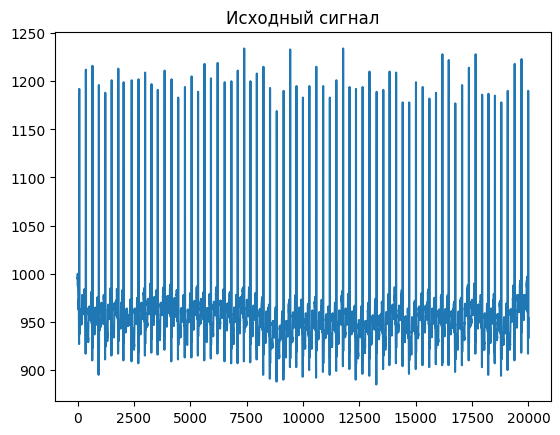

(20000,)


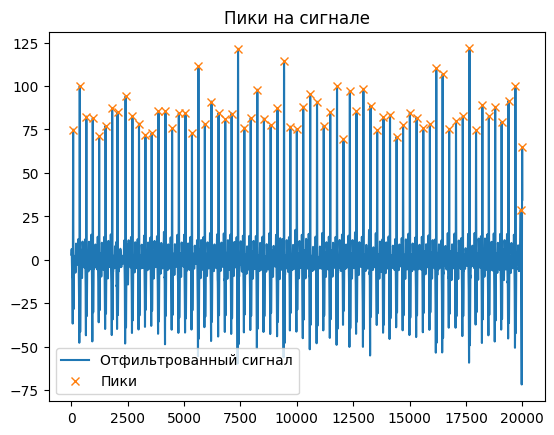

Характеристики сигнала: {'mean': 2.8862318840579713, 'std': 0.3107732359789018, 'min': 0.66, 'max': 3.58}


In [28]:
signal_processor = SignalProcessing(data)

signal_processor.visualize()
print(signal_processor.get_shape())
signal_processor.visualize_peaks()
features = signal_processor.feature_extraction()
print(f"Характеристики сигнала: {features}")

In [29]:
import cv2
from scipy import ndimage as ndi
from skimage.filters import gabor_kernel

class ImageProcessing(BaseProcessing):

    def __init__(self, file_path):
        self.image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)

    def _filtering(self, image):
        return ndi.gaussian_filter(image, .5)

    def visualize(self):
        plt.imshow(self.image, cmap='gray')
        plt.title("Исходное изображение")
        plt.show()

    def get_shape(self):
        return self.image.shape

    def _create_gabor_filter(self, frequency=0.25, theta=np.pi, sigma=1):
        return np.real(gabor_kernel(frequency, theta=theta, sigma_x=sigma, sigma_y=sigma))

    def feature_extraction(self):
        image_filtered = self._filtering(self.image)
        gabor_filter = self._create_gabor_filter()
        conv = ndi.convolve(image_filtered, gabor_filter, mode='wrap')
        return [conv.mean(), conv.var()]

    def visualize_filter(self):
        gabor_filter = self._create_gabor_filter()
        image_filtered = self._filtering(self.image)
        conv = ndi.convolve(image_filtered, gabor_filter, mode='wrap')

        plt.imshow(gabor_filter, cmap='gray')
        plt.title("Фильтр Габора")
        plt.show()

        plt.imshow(conv, cmap='gray')
        plt.title("Свертка изображения с фильтром Габора")
        plt.show()


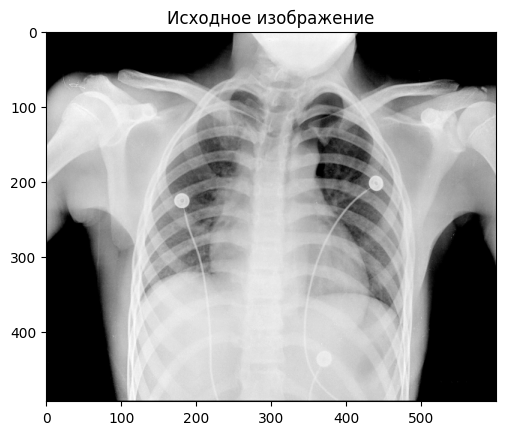

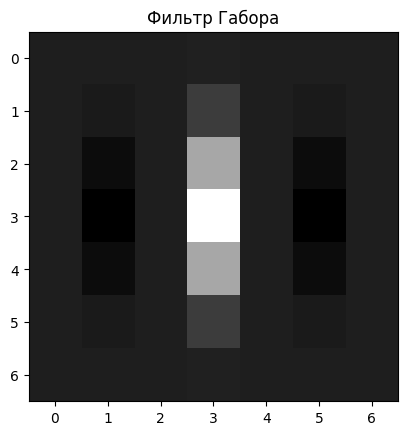

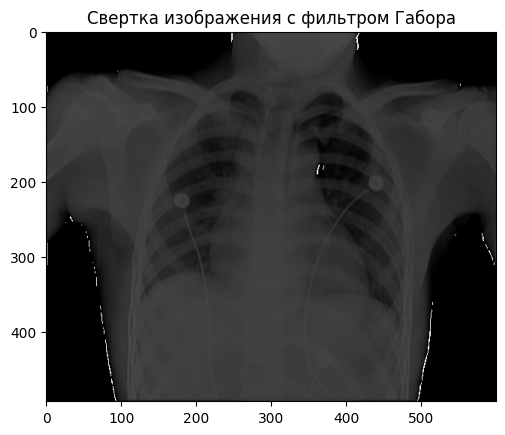

Характеристики изображения: [41.113566599053414, 670.1179849805205]


In [30]:
image_processor = ImageProcessing("chest-xray.tif")

image_processor.visualize()
image_processor.visualize_filter()
features = image_processor.feature_extraction()
print(f"Характеристики изображения: {features}")